In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
file_path = 'tamil_tracks.csv'
music_data = pd.read_csv(file_path)







In [43]:
# Selecting relevant features
selected_columns = ["energy", "popularity", "danceability", "tempo", "time_signature","key", "instrumentalness"]
filtered_data = music_data[selected_columns]



In [44]:
# Feature scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(filtered_data)


In [45]:

# Add scaled features to the dataset
music_data["scaled_features"] = list(scaled_features)


In [46]:
# Split the dataset into training and test sets
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

In [47]:

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Final embedding layer
    Dense(X_train.shape[1], activation='linear')  # Output the reconstructed input
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [49]:

# Train the model
history = model.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=20, batch_size=64)


Epoch 1/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - loss: 0.0485 - mae: 0.1423 - val_loss: 0.0020 - val_mae: 0.0335
Epoch 2/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 0.0035 - mae: 0.0443 - val_loss: 0.0014 - val_mae: 0.0308
Epoch 3/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.0021 - mae: 0.0330 - val_loss: 0.0031 - val_mae: 0.0492
Epoch 4/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 0.0017 - mae: 0.0292 - val_loss: 0.0057 - val_mae: 0.0672
Epoch 5/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.0014 - mae: 0.0270 - val_loss: 0.0085 - val_mae: 0.0793
Epoch 6/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.0013 - mae: 0.0257 - val_loss: 0.0093 - val_mae: 0.0785
Epoch 7/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.0012 - mae: 0.0246 - val_loss: 0.0091 - val_mae: 0.0751
Epoch 8/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.0011 - mae: 0.0231 - val_loss: 0.0087 - val_mae: 0.0685
Epoch 9/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 

In [50]:
# Evaluate the model
loss, mae = model.evaluate(X_test, X_test)
print(f"Model Loss: {loss}, Model MAE: {mae}")


390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - loss: 0.0132 - mae: 0.0780
Model Loss: 0.013236770406365395, Model MAE: 0.07796050608158112


In [51]:

# Extract embeddings for all songs
embeddings = model.predict(scaled_features)



1948/1948 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step


In [52]:
# Add embeddings back to the dataset
music_data["embeddings"] = list(embeddings)



In [53]:
# Define a function to recommend songs based on embeddings
def recommend_songs_nn(input_song_embedding, music_data, n_recommendations=20):
    # Compute cosine similarity between input song embedding and all others
    similarities = cosine_similarity([input_song_embedding], list(music_data["embeddings"]))[0]
    
    # Add similarity scores to the dataset
    music_data["similarity"] = similarities
    
    # Get top N recommendations excluding the song itself
    recommendations = music_data.sort_values(by="similarity", ascending=False).head(n_recommendations + 1)
    
    # Exclude the input song itself and return top N songs
    return recommendations.iloc[1:]  # Exclude the input song


In [54]:
# Example: Use one sample song
sample_song_index = 0  # You can change this index for other songs
sample_song = music_data.iloc[sample_song_index]
sample_embedding = sample_song["embeddings"]

In [55]:
# Get recommendations for the sample song
recommended_songs = recommend_songs_nn(sample_embedding, music_data)

In [56]:
# Display results
print("\nSample Song:")
print(sample_song[["track_name", "artist_name", "energy", "popularity", "danceability", "tempo", "time_signature", "key", "instrumentalness"]])

print("\nRecommended Songs:")
print(recommended_songs[["track_name", "artist_name", "energy", "popularity", "danceability", "tempo", "time_signature", "key", "instrumentalness"]])



Sample Song:
track_name          Leo Das Entry (From "Leo")
artist_name                Anirudh Ravichander
energy                                    0.97
popularity                                  59
danceability                             0.753
tempo                                  110.997
time_signature                             4.0
key                                        8.0
instrumentalness                        0.0553
Name: 0, dtype: object

Recommended Songs:
                             track_name  \
28912                             Magic   
28865                             Magic   
15138                            Ghagra   
30820                     SAY SOMETHING   
29535                  One In A Billion   
28906                             Magic   
5926                         Dum Masala   
54828      I Want You Back - Radio Edit   
32753                    Hello Stranger   
43377                         Forgotten   
31271                     Flash Forward   
3523

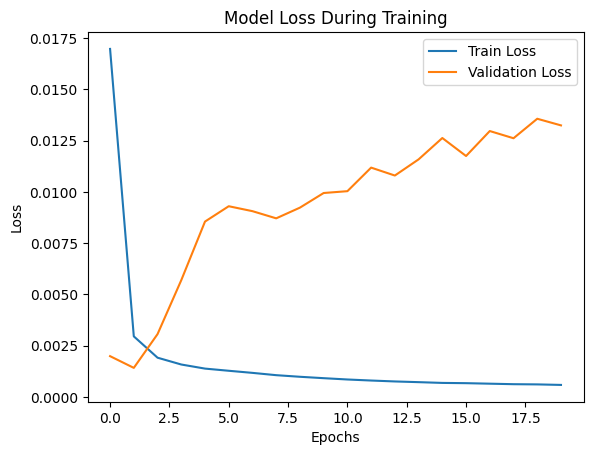

In [57]:
# Plot training metrics
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


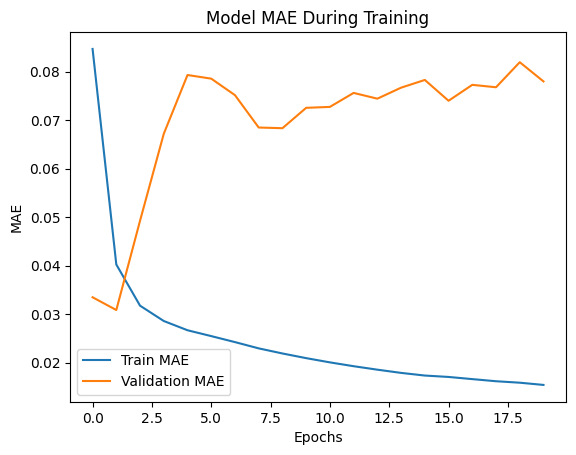

In [58]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()
